# OnlineStats Examples

### Online Linear Regression

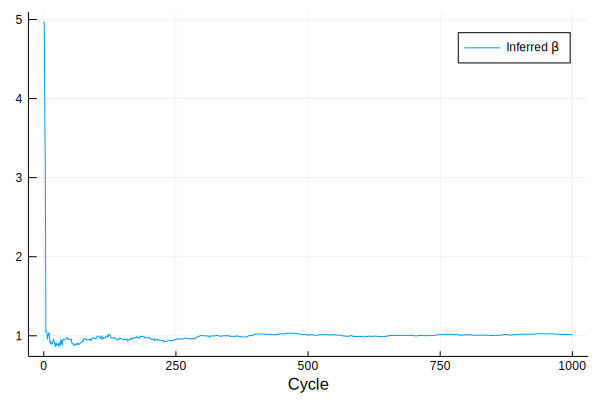

In [110]:
using OnlineStats, LossFunctions, PenaltyFunctions
using Random, Plots

Random.seed!(82)

# Data Parameters
n, p = 1000, 1
β = 1:p
ϵ = 0.5

# Data Generation
X = randn(n, p)
Y = X * β + ϵ * randn(n)

# Define model
LossFunc = L2DistLoss()
PenaltyFunc = L2Penalty()
updater = SGD()
model = StatLearn(p, LossFunc, PenaltyFunc, updater, rate=EqualWeight())

# Outputs
inferred_β = zeros(n)
loss = zeros(n)

# Online fit
for i in 1:n
    Xᵢ = @view X[i, :]
    Yᵢ = Y[i]
    fit!(model, (Xᵢ, Yᵢ))
    inferred_β[i] = coef(model)[1]
    loss[i] = OnlineStats.objective(model, X, Y)
end

plot(inferred_β, label="Inferred \\beta", xlabel="Cycle")

### Online Linear Regression with Varying $\beta$

This example uses a variable learning rate (see [Weights](https://joshday.github.io/OnlineStats.jl/latest/weights/)) and can be adjusted in the following interactive plot.

In [111]:
using Interact

learningRates = 0.1:0.05:1

# Data Parameters
n = 5000
ϵ = 0.2

# Data Generation
X = randn(n, p)
Y = [x * sin(i / 400) + ϵ * randn(1)[1] for (i, x) in enumerate(X)]

# Define model
LossFunc = L2DistLoss()
PenaltyFunc = L2Penalty()
updater = SGD()
z = 1:n

# Interactive plot for LR
@manipulate for lr in learningRates
    model = StatLearn(p, LossFunc, PenaltyFunc, updater, rate=LearningRate(lr))

    inferred_β = zeros(n)
    loss = zeros(n)

    for i in 1:n
        Xᵢ = @view X[i, :]
        Yᵢ = Y[i]
        fit!(model, (Xᵢ, Yᵢ))
        inferred_β[i] = coef(model)[1]
    end

    plot(inferred_β, label="Inferred \\beta", xlabel="Cycle")
    plot!(sin.(z/400), label="Real \\beta")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["lr"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 19,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/chaichontat/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/chaichontat/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/chaichontat/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/chaichontat/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/chaichontat/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000125cc0d90, Task (runnable) @0x0000000125cc0d90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.15\",\"0.2\",\"0.25\",\"0.3\",\"0.35\",\"0.4\",\"0.45\",\"0.5\",\"0.55\",\"0.6\",\"0.65\",\"0.7\",\"0.75\",\"0.8\",\"0.85\",\"0.9\",\"0.95\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":

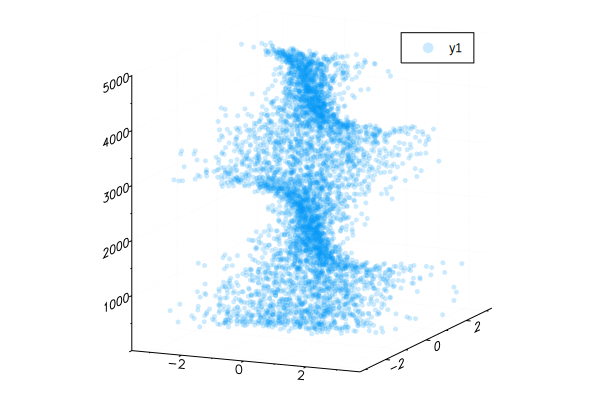

In [112]:
Plots.scatter3d(X, Y, i, zlim=(0,n), marker=3, markeralpha=0.2, markerstrokewidth=0)